# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this activty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


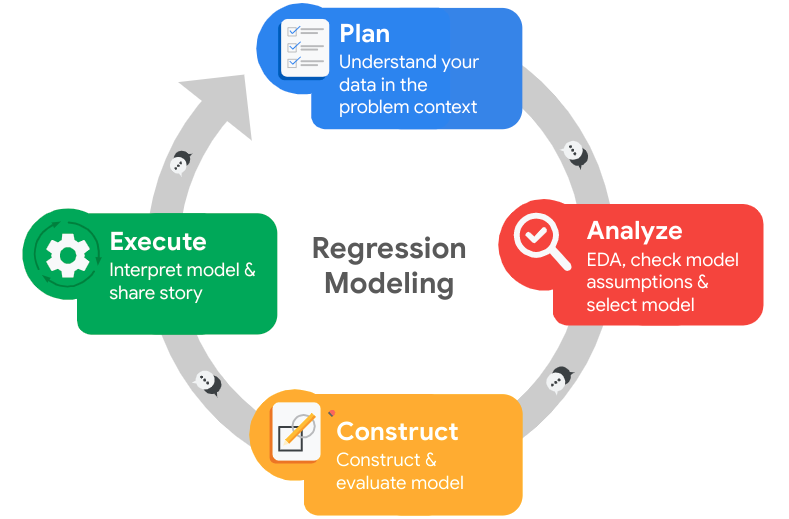

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [176]:
### IMPORTING PACKAGES ###

# Import packages for eda and data cleaning
import pandas as pd
import numpy as np

# Import packages for visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for modelling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import packages for getting metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Load dataset into a dataframe
hr_data = pd.read_csv("../data/external/HR_capstone_dataset.csv")

# Display first few rows of the dataframe
hr_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
hr_data = hr_data.rename(columns={
  "average_montly_hours": "average_monthly_hours",
  "time_spend_company": "tenure",
  "Work_accident": "work_accident",
  "Department": "department",
})

# Display all column names after the update
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
num_duplicates = hr_data.duplicated().sum()

# Calculating amount of duplicated data
print(f"The dataset contains {num_duplicates} duplicates. This is equal to {round(num_duplicates/hr_data.shape[0]*100)}% of the data.")

The dataset contains 3008 duplicates. This is equal to 20% of the data.


In [11]:
# Inspect some rows containing duplicates as needed
duplicated_rows = hr_data[hr_data.duplicated()]

# Displaying rows
duplicated_rows.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The duplicates could be could reflect that employees have responded exactly the same across the different variables. However, it seems very unlikely that this would be the case for 3008 employees across 10 variables. In other words, it doesn't seem like the duplicates reflect legitimate entries into the dataset. Therefore, I proceed to drop the duplicates. 

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
hr_data_no_duplicates = hr_data.drop_duplicates(keep="first")

# Display first few rows of new dataframe as needed
hr_data_no_duplicates.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


To explore the consequences of removing the duplicates for the data set, I create a plot of the distributions of central variables. The overall picture is, that the distributions are roughly the same for the data sets with and without duplicates. This indicates that removing the duplicates doesn't seem to change the data significantly. To futher explore the consequences I could run the later models both with and without the duplicates.

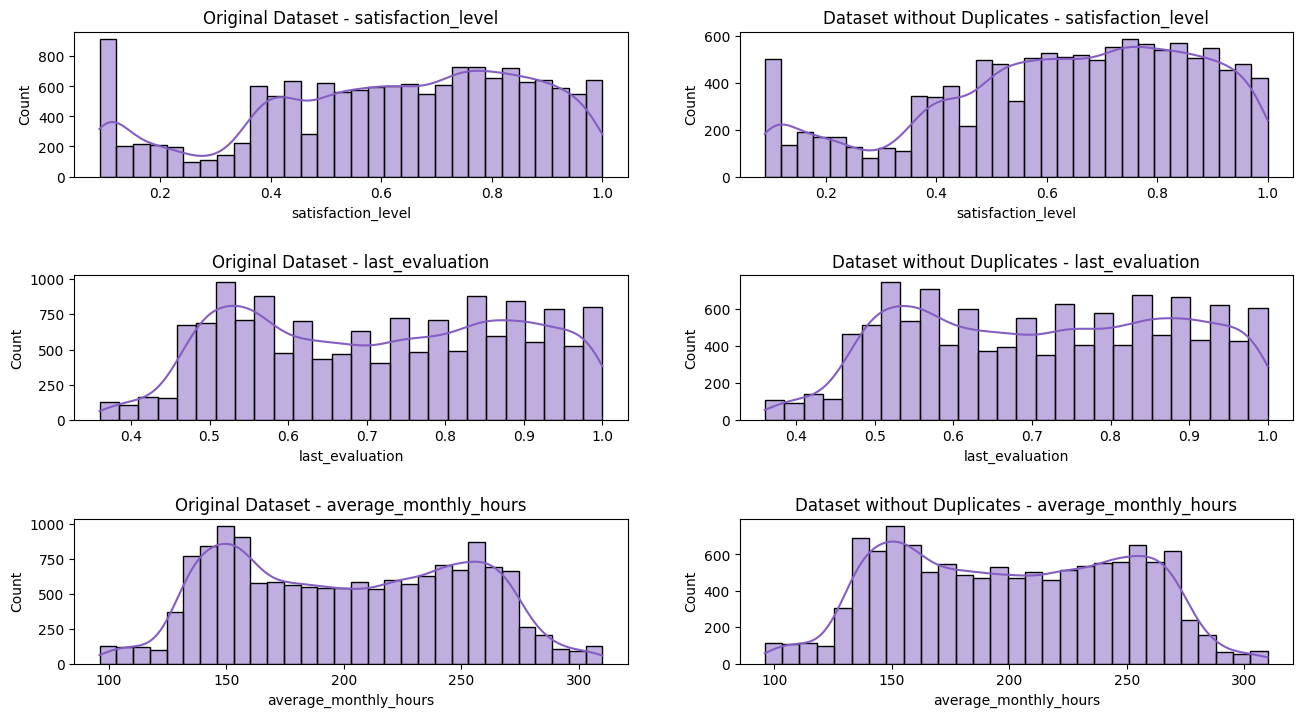

In [84]:
# Function to plot distributions
def plot_distributions(df1, df2, columns, title1, title2):
    fig, axes = plt.subplots(len(columns), 2, figsize=(14, 8))
    fig.tight_layout(pad=5.0)
    
    for i, col in enumerate(columns):
        sns.histplot(df1[col], kde=True, ax=axes[i, 0], color="#845EC2")
        axes[i, 0].set_title(f'{title1} - {col}')
        
        sns.histplot(df2[col], kde=True, ax=axes[i, 1], color="#845EC2")
        axes[i, 1].set_title(f'{title2} - {col}')
    
    plt.show()

# Select columns to compare
columns_to_compare = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']  # Replace with relevant columns
plot_distributions(hr_data, hr_data_no_duplicates, columns_to_compare, 'Original Dataset', 'Dataset without Duplicates')

### Check outliers

Check for outliers in the data.

<Axes: title={'center': "Boxplot to Detect Outliers in 'Tenure' Variable"}, xlabel='tenure'>

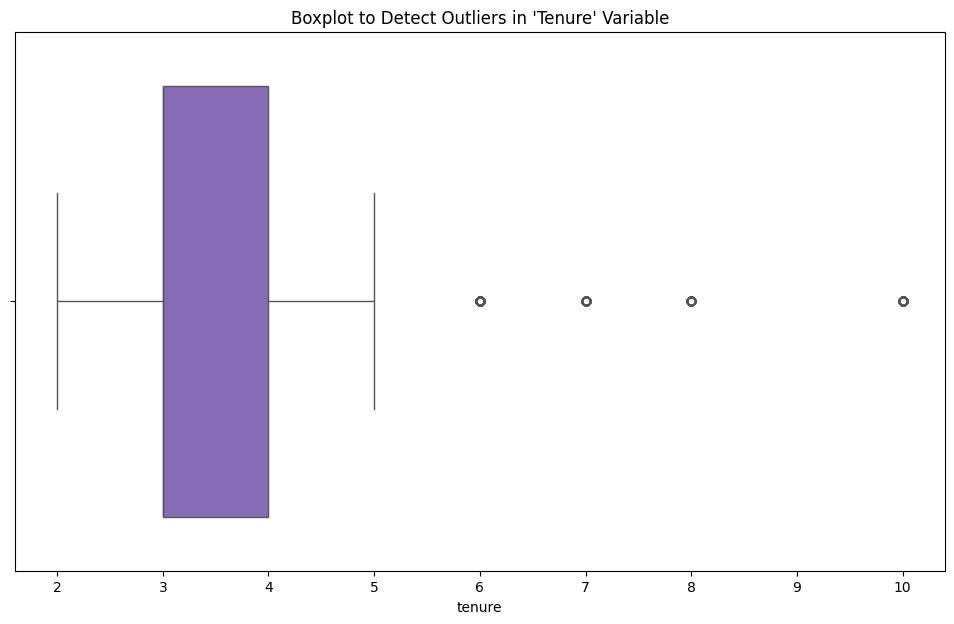

In [86]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(12,7))
plt.title("Boxplot to Detect Outliers in 'Tenure' Variable")
sns.boxplot(data=hr_data_no_duplicates, x="tenure", color="#845EC2")

The boxplot indicates that the tenure variable contains outliers. To investigate this further, I calculate the number of rows that contains outliers using the inter quartile range method.

In [162]:
# Determine the number of rows containing outliers
# Define function to calculate outliers and limits
def detect_outliers_iqr(df, column):
  percentile_25 = df[column].quantile(0.25)
  percentile_75 = df[column].quantile(0.75)
  iqr = percentile_75 - percentile_25
  lower_limit = percentile_25 - 1.5 * iqr
  upper_limit = percentile_75 + 1.5 * iqr
  outliers = df[(df[column] > upper_limit) | (df[column] < lower_limit)]
  return outliers, lower_limit, upper_limit

# Identifying outliers and limits for numerical variables 
for column in ['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'tenure', 'work_accident', 'left', 'promotion_last_5years']:
  print(f"Checking for outliers in: {column}")
  outliers, lower_limit, upper_limit = detect_outliers_iqr(hr_data_no_duplicates, column)
  print(f"The lower limit is: {lower_limit}")
  print(f"The upper limit is: {upper_limit}")
  print(f"The number of outliers is: {len(outliers)}")
  print("\n")

Checking for outliers in: satisfaction_level
The lower limit is: -0.030000000000000027
The upper limit is: 1.33
The number of outliers is: 0


Checking for outliers in: last_evaluation
The lower limit is: 0.1349999999999999
The upper limit is: 1.295
The number of outliers is: 0


Checking for outliers in: number_project
The lower limit is: 0.0
The upper limit is: 8.0
The number of outliers is: 0


Checking for outliers in: average_monthly_hours
The lower limit is: 28.0
The upper limit is: 372.0
The number of outliers is: 0


Checking for outliers in: tenure
The lower limit is: 1.5
The upper limit is: 5.5
The number of outliers is: 824


Checking for outliers in: work_accident
The lower limit is: 0.0
The upper limit is: 0.0
The number of outliers is: 1850


Checking for outliers in: left
The lower limit is: 0.0
The upper limit is: 0.0
The number of outliers is: 1991


Checking for outliers in: promotion_last_5years
The lower limit is: 0.0
The upper limit is: 0.0
The number of outliers i

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# Pace: Analyze Stage
- Perform EDA (analyze relationships between variables)



### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [29]:
# Get numbers of people who left vs. stayed
no_left = hr_data_no_duplicates['left'].sum()
no_stayed = len(hr_data_no_duplicates['left']) - hr_data_no_duplicates['left'].sum()

# Get percentages of people who left vs. stayed
percentage_left = no_left/len(hr_data_no_duplicates['left'])*100
percentage_stayed = 100-percentage_left

# Print numbers
print(f"The number of people who left is {no_left} corresponding to {round(percentage_left)}%")
print(f"The number of people who stayed is {no_stayed} corresponding to {round(percentage_stayed)}%")

The number of people who left is 1991 corresponding to 17%
The number of people who stayed is 10000 corresponding to 83%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

The HR department at Salifort Motors are interested in knowing more about the factors that make employees more likely to quit. Therefore, I will proceed to investigate the distribution of data across different variables for employees that have stayed versus employees that left. First, I will start by examining the average_monthly_hours variable.

In [97]:
# Setting colors for plots
color_left = "#845EC2"
color_stayed = "#00C9A7"
color_third = "#00D2FC"

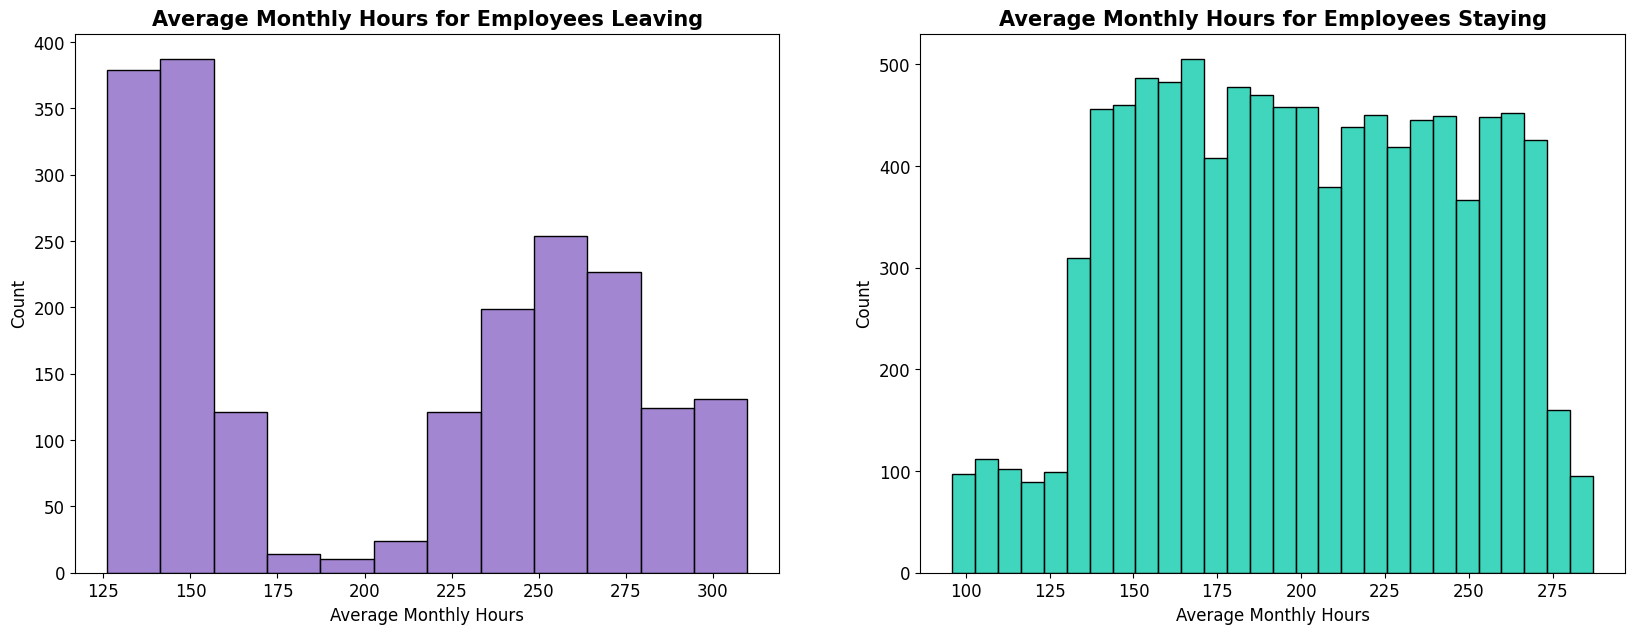

In [62]:
# Plotting histogram for average_monthly_hours
fig, ax = plt.subplots(1,2, figsize=(20,7))

# Plotting distribution of employees that left
sns.histplot(
  data=hr_data_no_duplicates[hr_data_no_duplicates["left"]==1],
  x="average_monthly_hours",
  color=color_left,
  ax=ax[0]
  )

ax[0].set_title("Average Monthly Hours for Employees Leaving", size=15, fontweight="bold")
ax[0].set_xlabel("Average Monthly Hours", size=12)
ax[0].set_ylabel("Count", size=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# Plotting distribution of employees that stayed
sns.histplot(
  data=hr_data_no_duplicates[hr_data_no_duplicates["left"]==0],
  x="average_monthly_hours",
  color=color_stayed,
  ax=ax[1]
  )

ax[1].set_title("Average Monthly Hours for Employees Staying", size=15, fontweight="bold")
ax[1].set_xlabel("Average Monthly Hours", size=12)
ax[1].set_ylabel("Count", size=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)

# Display subplot
plt.show()

The plot above indicates that there is quite a large number of employees who left the company that actually did not work that many ours. Furthermore, quite a large number of employees that left also worked more than 250 hours a month on average. However, the groups that didn't work that much or worked a lot are also represented quite well in the group of people who stayed. Therefore, it could be interesting to investigate this relationship further by also including data on the number of projects done by employees and their satisfaction level.

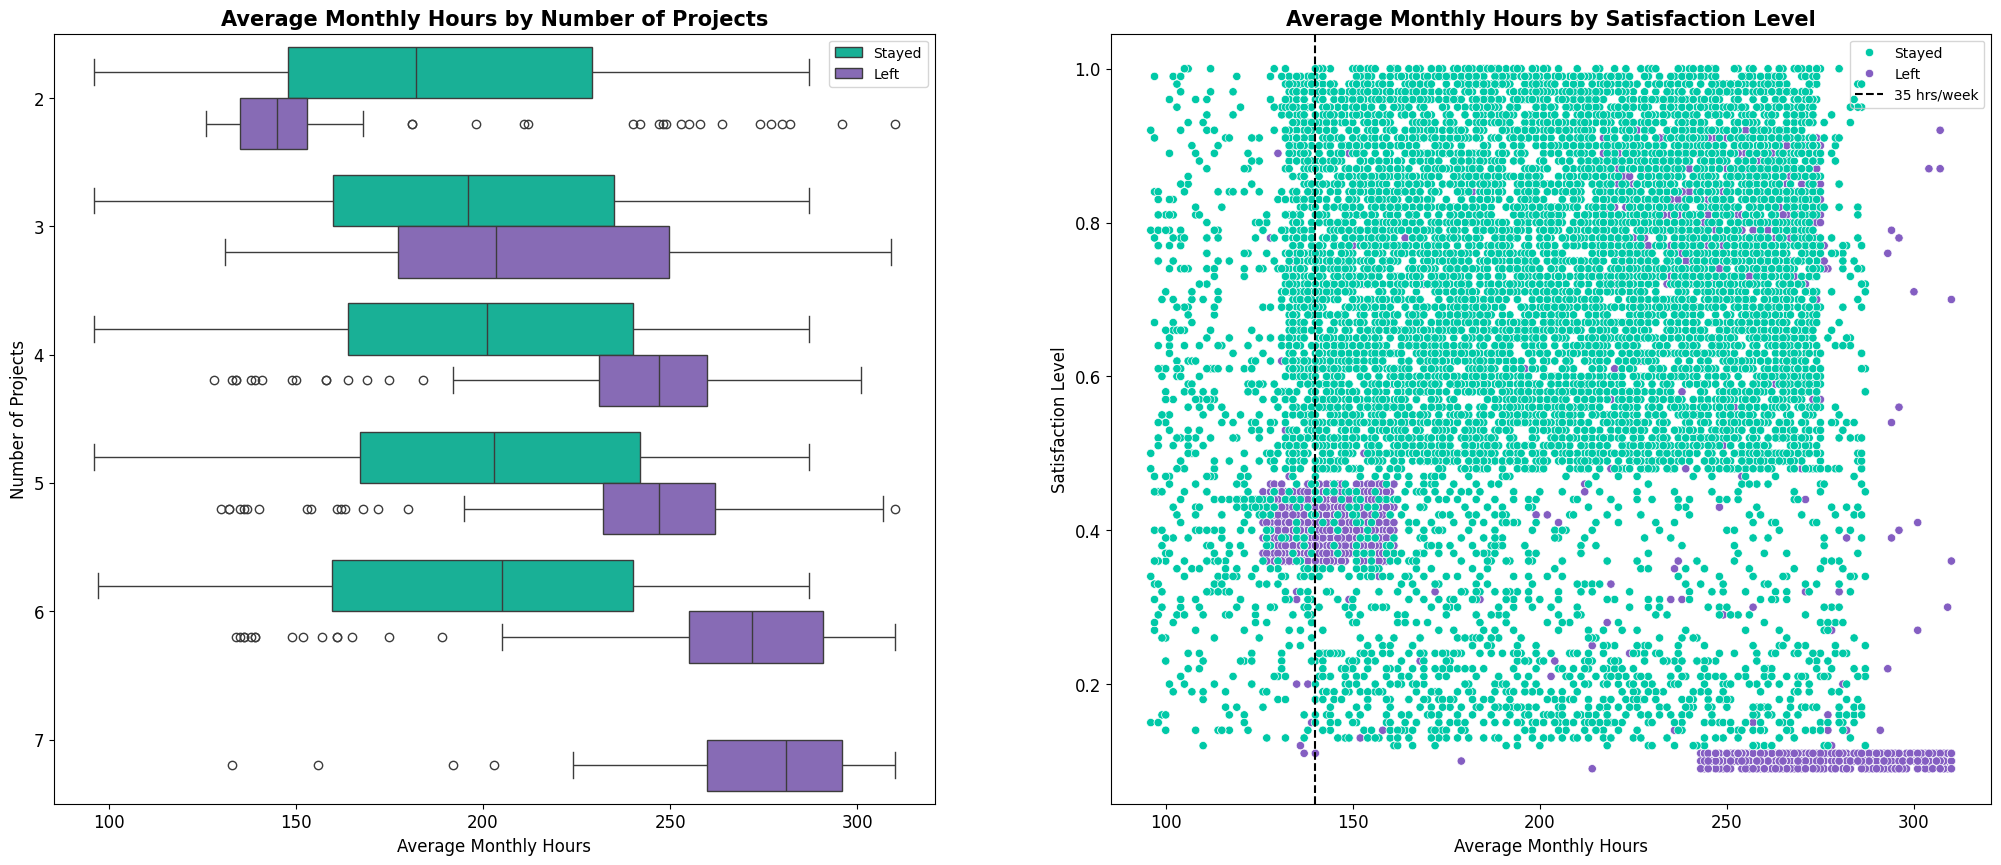

In [157]:
# Plots on hours worked, number of projects and satisfaction
fig, ax = plt.subplots(1,2, figsize=(25,10))

# Box plot
sns.boxplot(
  data=hr_data_no_duplicates,
  x="average_monthly_hours",
  y="number_project",
  hue="left",
  palette={0:color_stayed, 1:color_left},
  showfliers=True,
  orient="h",
  ax=ax[0]
)

# Setting title etc.
ax[0].set_title("Average Monthly Hours by Number of Projects", size=15, fontweight="bold")
ax[0].set_xlabel("Average Monthly Hours", size=12)
ax[0].set_ylabel("Number of Projects", size=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# Update legend labels for the box plot
handles, labels = ax[0].get_legend_handles_labels()
legend_boxplot = ax[0].legend(handles=handles, labels=["Stayed", "Left"], loc="best")
legend_boxplot.get_frame().set_facecolor('none')

# Scatterplot
sns.scatterplot(
  data=hr_data_no_duplicates,
  x="average_monthly_hours",
  y="satisfaction_level",
  hue="left",
  palette={0:color_stayed, 1:color_left},
  ax=ax[1]
)

ax[1].set_title("Average Monthly Hours by Satisfaction Level", size=15, fontweight="bold")
ax[1].set_xlabel("Average Monthly Hours", size=12)
ax[1].set_ylabel("Satisfaction Level", size=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].axvline(x=140, color="black", label="35 hrs/week", ls="--")

# Update legend labels for the box plot
handles, labels = ax[1].get_legend_handles_labels()
legend_scatter = ax[1].legend(handles=handles, labels=["Stayed", "Left", "35 hrs/week"], loc="best")
legend_scatter.get_frame().set_facecolor('none')

# Display subplot
plt.show()


**Observations from Box Plot**
- There is a group of people that worked considerably more hours than their peers with a similar number of projects. This could indicate that they are overworked or feel like they carry more of the load.
- There is a group of people that worked less than their peers with similar number of projects. Could indicate a lack of motivation or meaningful work to do.
- Everyone with 7 projects left the company. Most of them had a very high number of hours. This indicated that could be overworked.
- It seems like most people with 4-5 projects stayed. The ratio between people staying and people leaving is favourable here compared to other groups.
- With an average working week of 35-40 hours - 140-160 hours a month - many are at a higher level. Could be that employees in general are overworked.

**Observations from Scatter Plot**
- The data seems clustered into square shaped groups for the employees that left. This is a strange distribution that could indicate data manipulation of faults in the data. Also, it could indicate synthetically created data.
- Aside from that, it seems like there are three main groups of people who left:
  - Low satisfaction and high hours: These people could be overworked. They work a lot of hours weekly. Could be interesting to investigate whether this group didn't get promotions or similar - feeling under appreciated.
  - High satisfaction and high hours: Hard to explain why they left although they had a high level of satisfaction. Could be that they are actually performing well and had better job offers.
  - Low satisfaction and low hours: Difficult to explain why they left. Could be interesting to explore further. Could be feeling that they are underperforming because a lot of their collegues worked a lot more.

To investigate the leaving employees further, I will take a look at the hours worked at different salary levels. One hypothesis could be, that employees working alot with a low salary or without getting a promotion could be less satisfied and more likely to leave.

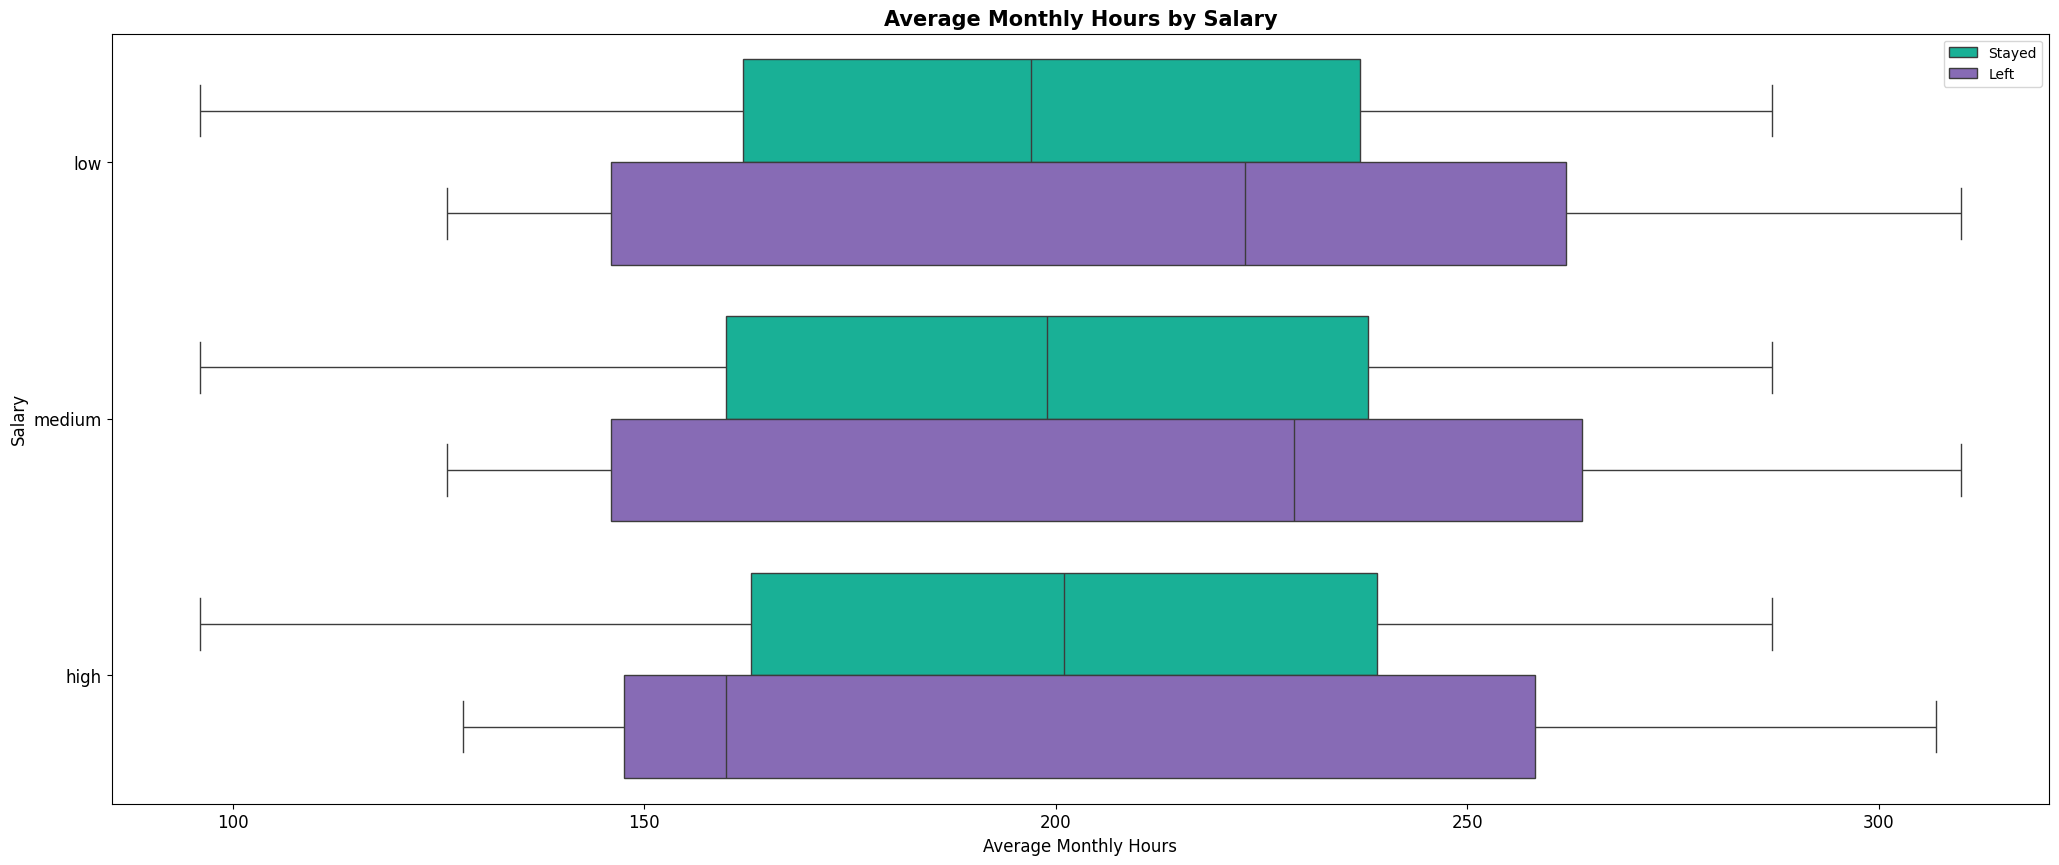

In [95]:
# Box plot - salary and working hours
fig, ax = plt.subplots(1,1, figsize=(25,10))

sns.boxplot(
  data=hr_data_no_duplicates,
  x="average_monthly_hours",
  y="salary",
  hue="left",
  palette={0:color_stayed, 1:color_left},
  showfliers=True,
  ax=ax
)

# Setting title etc.
ax.set_title("Average Monthly Hours by Salary", size=15, fontweight="bold")
ax.set_xlabel("Average Monthly Hours", size=12)
ax.set_ylabel("Salary", size=12)
ax.tick_params(axis='both', which='major', labelsize=12)

# Update legend labels for the box plot
handles, labels = ax.get_legend_handles_labels()
legend_boxplot = ax.legend(handles=handles, labels=["Stayed", "Left"], loc="best")
legend_scatter.get_frame().set_facecolor('none')

plt.show()


Interestingly, it does not seem like that the number of hours worked for the different salary groups are that different for the people leaving compared to the people staying. This indicated that salary may not be as important for knowing whether people leave or not. However, it could be that people that have worked their for a long time without getting promoted would choosed to leave feeling that their work is not recognized.

In [120]:
# Group by tenure category, left/stayed, and salary category
grouped = hr_data_no_duplicates.groupby(['tenure', 'left', 'salary']).size().reset_index(name='count')

# To calculate proportions within each tenure category and left/stayed group
grouped['proportion'] = grouped.groupby(['tenure', 'left'])['count'].transform(lambda x: x / x.sum())

# Define tenure categories
bins = [0, 3, 7, float('inf')]
labels = ['short', 'medium', 'long']
grouped['tenure_category'] = pd.cut(grouped['tenure'], bins=bins, labels=labels, right=False)

# Print data
grouped


,tenure,left,salary,count,proportion,tenure_category
0,2,0,high,258,0.089614,short
1,2,0,low,1362,0.473081,short
2,2,0,medium,1259,0.437305,short
3,2,1,low,12,0.387097,short
4,2,1,medium,19,0.612903,short
5,3,0,high,396,0.091752,medium
6,3,0,low,1993,0.461770,medium
7,3,0,medium,1927,0.446478,medium
8,3,1,high,23,0.026316,medium
9,3,1,low,526,0.601831,medium


Tenure and salary
Tenure and promotion

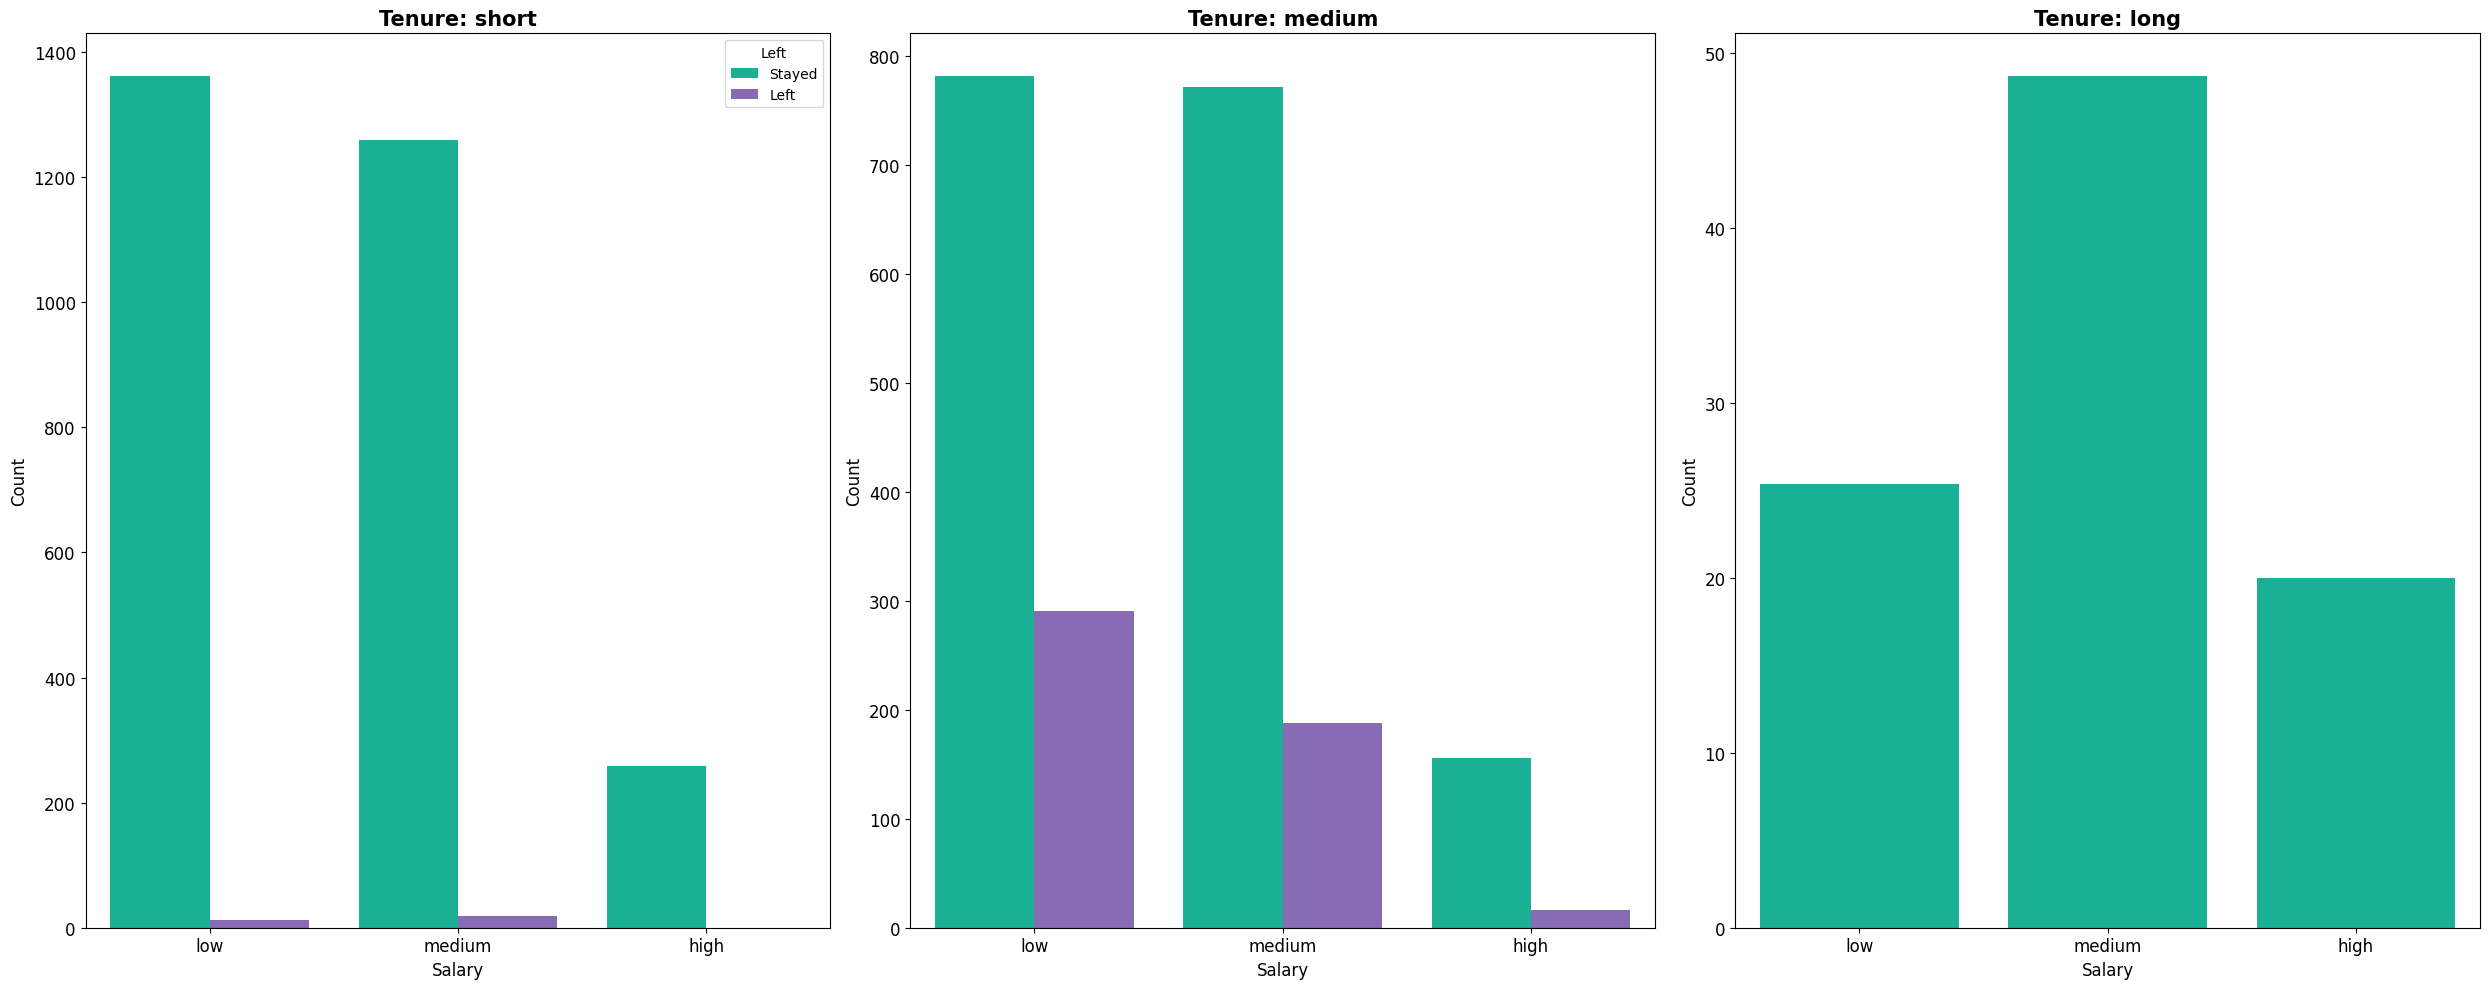

In [124]:
# Create a faceted bar plot
fig, axes = plt.subplots(1,3, figsize=(25, 10))

# Tenure categories
tenure_categories = ["short", "medium", "long"]

# Plot each tenure category
for i, tenure_category in enumerate(tenure_categories):
    ax = axes[i]
    sns.barplot(
        data=grouped[grouped['tenure_category'] == tenure_category],
        x='salary',
        y='count',
        hue='left',
        order=["low", "medium", "high"],
        palette={0: color_stayed, 1: color_left},
        errorbar=None,
        ax=ax
    )
    ax.set_title(f'Tenure: {tenure_category}', size=15, fontweight='bold')
    ax.set_xlabel('Salary', size=12)
    ax.set_ylabel('Count', size=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    if i == 0:
        ax.legend(title='Left', labels=['Stayed', 'Left'])
    else:
        ax.legend().remove()

plt.tight_layout()
plt.show()

This indicates that most people that left the company was in the medium tenured groupe (3-6 years of tenure). Furthermore, most of the ones leaving had a low salary. Howver, a large group of those who left also had a medium salary. On the contrary, none of the people leaving had a tenure of 7 years or more. This suggests that eventual efforts too keep people at the company should be focues on employees with a medium tenure. 

In the following, I take a closer look at the different departments to investigate whether or not some departments are better at making people stay. This could help in identifying what such departments are doing right compared to others.

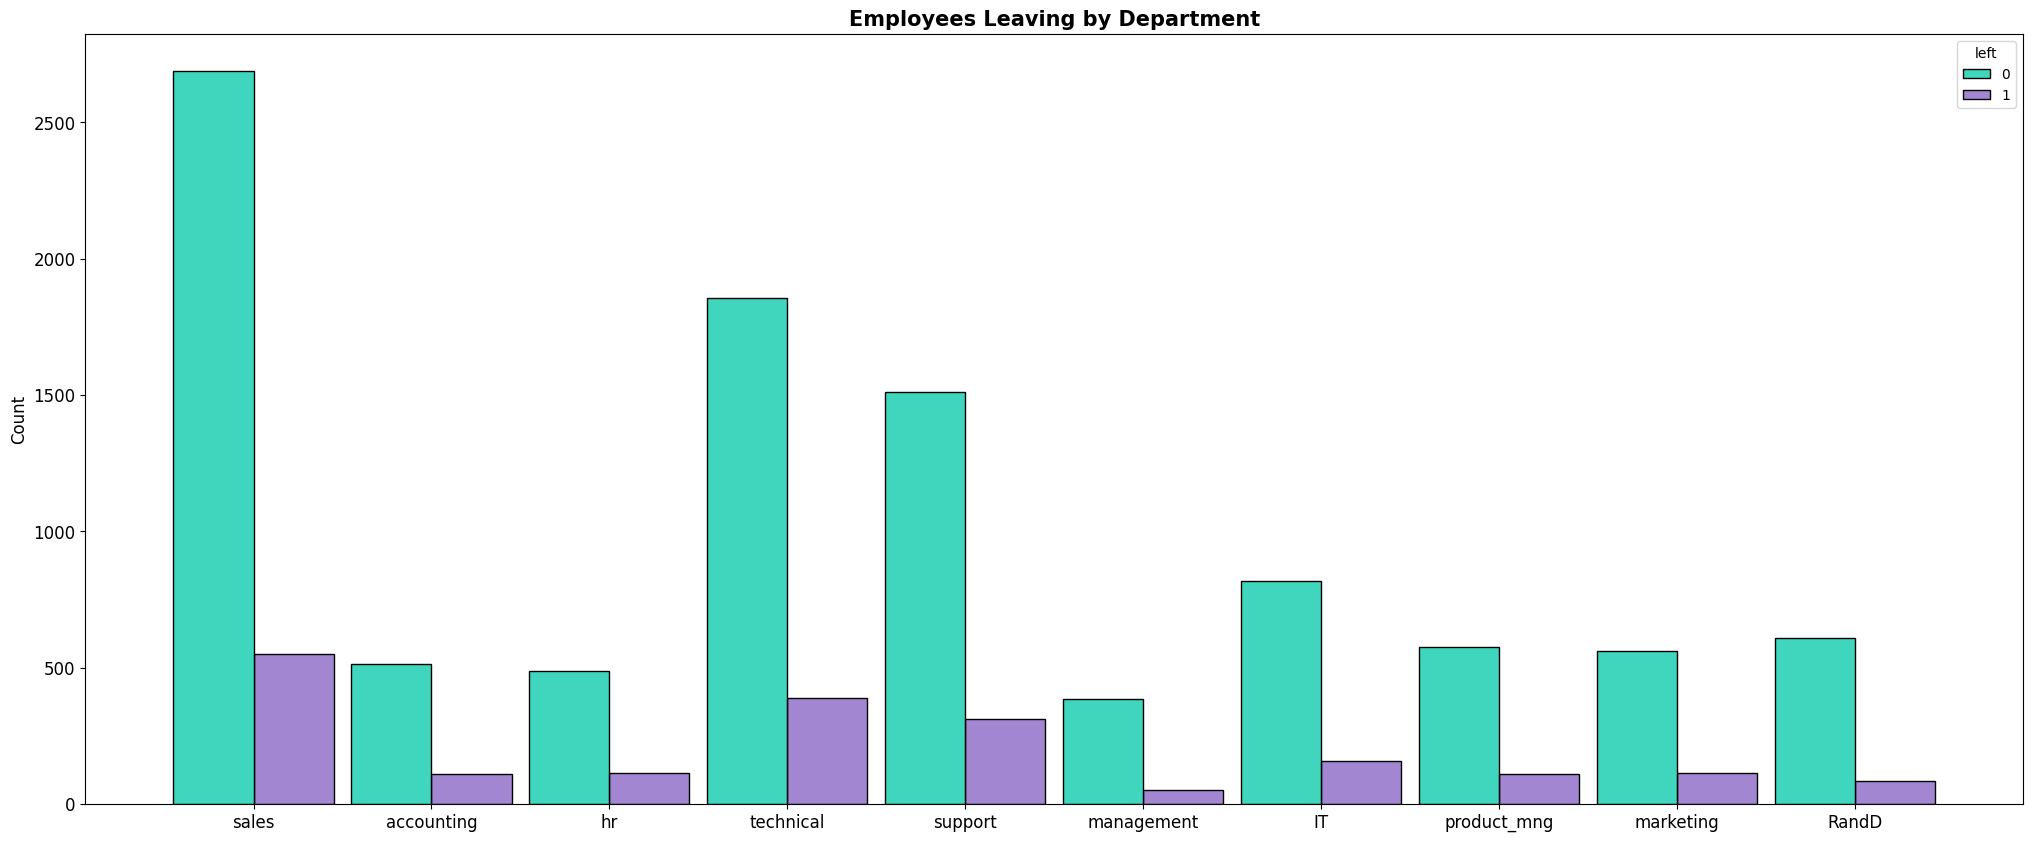

In [139]:
# Plots on employees leaving by department
fig, ax = plt.subplots(1,1, figsize=(25,10))

# Box plot
sns.histplot(
  data=hr_data_no_duplicates,
  x="department",
  hue="left",
  palette={0:color_stayed, 1:color_left},
  multiple="dodge",
  shrink=0.9,
  ax=ax
)

# Setting title etc.
ax.set_title("Employees Leaving by Department", size=15, fontweight="bold")
ax.set_xlabel("", size=12)
ax.set_ylabel("Count", size=12)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

The above plot indicates that there is no specific department that seems to have a larger proportion of employees leaving compared to others.

Another hypothesis could be that people that works alot without receiving a good evaluation will be less satisfied compared to others because they feel like their work is under appreciated. To investigate this further, I will create a scatterplot of average hours worked compared to their last evaluation.

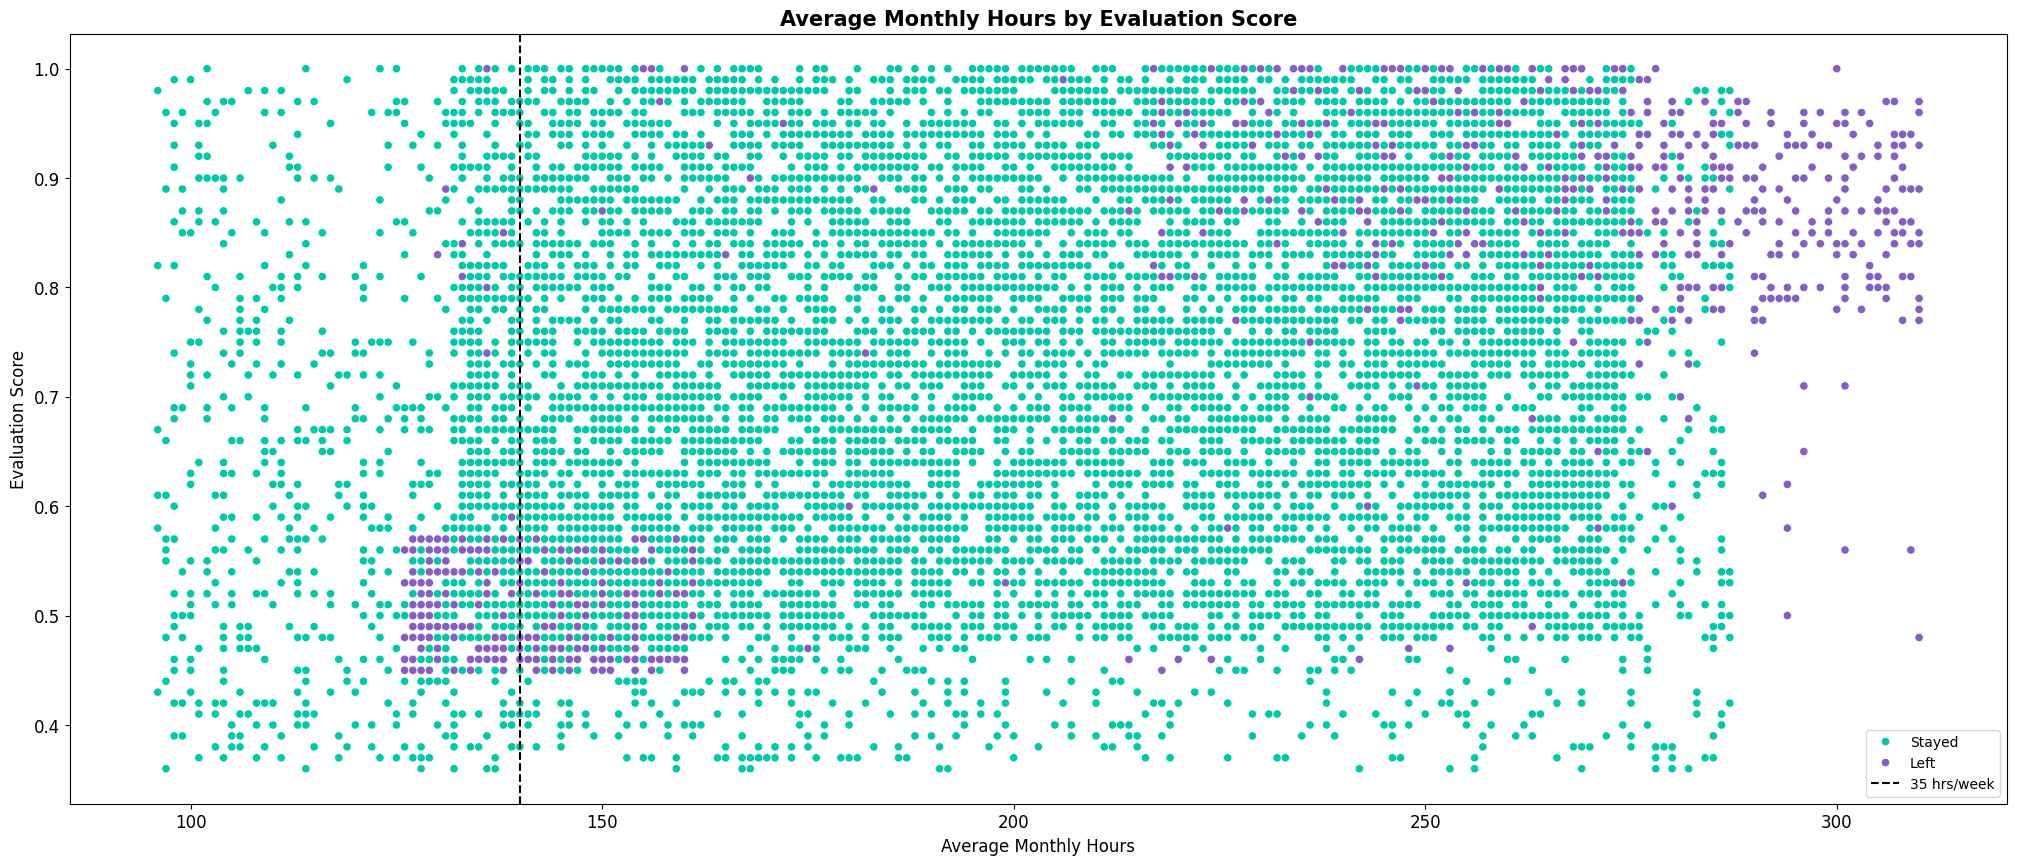

In [140]:
# Plots on hours worked and evaluation
fig, ax = plt.subplots(1,1, figsize=(25,10))
sns.scatterplot(
  data=hr_data_no_duplicates,
  x="average_monthly_hours",
  y="last_evaluation",
  hue="left",
  palette={0:color_stayed, 1:color_left},
  ax=ax
)

ax.set_title("Average Monthly Hours by Evaluation Score", size=15, fontweight="bold")
ax.set_xlabel("Average Monthly Hours", size=12)
ax.set_ylabel("Evaluation Score", size=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.axvline(x=140, color="black", label="35 hrs/week", ls="--")

# Update legend labels for the box plot
handles, labels = ax.get_legend_handles_labels()
legend_scatter = ax.legend(handles=handles, labels=["Stayed", "Left", "35 hrs/week"], loc="best")
legend_scatter.get_frame().set_facecolor('none')

# Display subplot
plt.show()

There seems to be to main groups of people leaving. One group that worked a lot and received a high evaluation score. The fact that they did not work a lot and get low score seems to be in contrast to the hyptheses. This gives evidence to the hypothesis that overworking seems to be a central problem. Also, there is a group of people work normal weekly hours that get a low/medium evaluation. However, there is also a lorge group of employees with similar hours and evaluations that does not leave. In general, it seems like there is a positive correlation between working alot of hours and getting a high evaluation. This suggests that the company may be putting a high level of emphasis on working alot if you want to perform well. This is further substantiated by the fact, that there is not a lot of employees with a low number of hours and a high evaluation score.

Lastly, I will check the correlation between the variables by creating a heatmap of correlation scores.

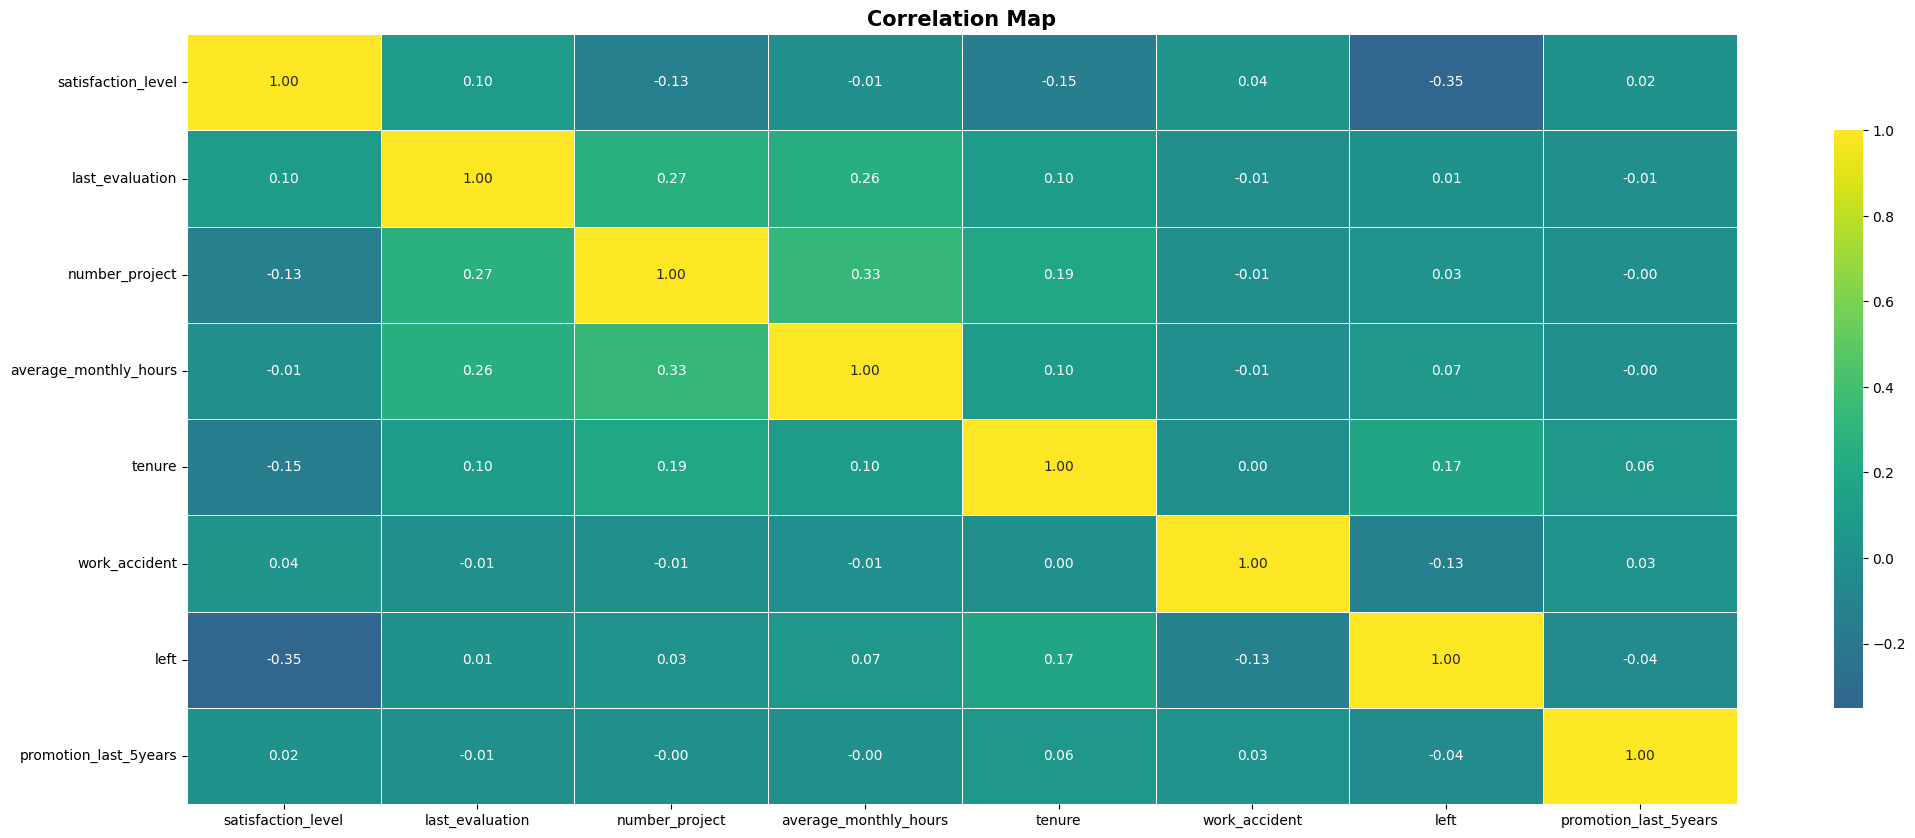

In [156]:
# Calculate the correlation matrix
corr_matrix = hr_data_no_duplicates[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", center=0, linewidths=.5, cbar_kws={"shrink": .75})

# Add title
plt.title('Correlation Map', fontsize=15, fontweight='bold')

plt.show()

The plot shows that leaving is negative correlated with the satisfaction level. This is in line with the data exploration above. People leaving are thus on average less satisfied than their peers. Furthermore, there is a positive correlation between average monthly hours worked and the number of projects. Also, the last evaluation scores is positively correlaqted with the number of hours worked confirming that people working longer hours seems get a higher evaluation.

### Insights

The main conclusion seems to be that most of the employees that are leaving are working very long hours. This indicates that there is a problem with overworking and employees may be burnt out. As hypothesised earlier, it can be dissatisfying to work long hours week after week. It also seems like people with a higher tenure tend to stay at the company. It could be interesting to do follow-up interviews with these employees to understand their reasons for staying better. This could be translated into actions that the company could take to make people stay longer.

# Pace: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether and employee will leave the company or not. This is a categorical outcome variable that can take the value 0 (staying) or 1 (leaving). In other words, the prediction task can be characterized as a binary categorization task. 

### Identify the types of models most appropriate for this task.

There are several potential models to use. For example, I can use a logistic regression model. However, it is also possible to used a tree-based model like XGBoost or Random Forrest Classifier. In the following, I will use both a logistic regression model and a tree-based model. This will allow me to compare the models to see which one performs best. Also, this helps to give an indication of the robustness of the models.

### Modeling

Add as many cells as you need to conduct the modeling process.

Before continuing, I will first convert the ordinal variables 'Salary' and 'Department'. Salary has an inherent order. Therefore, I can convert this into and ordinal variable with an order to it. The 'Department' variable is categorical and do not have an implicit order to it. Therefore, I will instead use one-hot-encoding to create binary variables indicating whether or not a specific observation belongs to one of the categories.

In [159]:
# Creating a copy of the data set for modelling
df_models = hr_data_no_duplicates.copy()

# Creating ordinal salary variable
salary_map = {
  "low": 0,
  "medium": 1,
  "high": 2
}

df_models["salary"] = df_models["salary"].map(salary_map)

# Creating binary department variables
df_models = pd.get_dummies(df_models, drop_first=False, dtype="int")

# Displaying new dataframe
df_models.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Logistic Regression Model

Since the task involves binary classification, I will use a binomial logistic regression model.

Logistic regression models are sensitive to outliers. Therefore, I will proceed to remove the outliers from the tenure variable that we identified earlier. There are also outliers in other variables, however these variables are all binary why I choose to keep them in for the following reasons:
- Binary Nature: In binary classes, each instance represents a valid and distinct outcome. For example, having a work accident (1) or not having a work accident (0) are both legitimate outcomes that need to be considered in your analysis.
- Rarity as Information: The rarity of certain events (such as work accidents) is crucial information. Removing these “outliers” would lead to a loss of important data and could bias the results of the analysis. The fact that work accidents are rare is an essential characteristic of the data that should be preserved.
- Contextual Relevance: Outliers in numerical data are typically removed or treated because they can skew statistical measures like the mean and standard deviation (Tenure). However, for categorical variables, especially binary ones, the concept of an outlier doesn’t apply in the same way. Each category value is inherently valid.
- Data Integrity: Removing instances of rare but significant events could distort the understanding and predictive modeling of those events. For instance, in an employee retention study, knowing that a work accident has occurred and its impact on retention is important.

In [170]:
# Removing tenure outliers
outliers, lower_limit, upper_limit = detect_outliers_iqr(df_models, "tenure")
df_models_log = df_models[(df_models['tenure'] >= lower_limit) & (df_models['tenure'] <= upper_limit)]
df_models_log.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Creating the outcome variable.

In [173]:
# Isolating y
y = df_models_log["left"]
y.value_counts()

left
0    9285
1    1882
Name: count, dtype: int64

Selecting the features to use in the model. 

In [174]:
# Dropping the outcome variable
X = df_models_log.drop("left", axis=1)

# Displaying the dataframe with features
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Splitting the data into training and test set. As seen from the value_counts() call on the outcome variable, the classes are unbalanced. Therefore, I stratify the split on y.

In [177]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Creating the model.

In [181]:
# Creating a logistic regression model and fitting it to the training data
log_clf = LogisticRegression(random_state=42, max_iter=600).fit(X_train, y_train)

Testing the model on the test data.

In [182]:
# Predicting with the logistic regression model
y_pred = log_clf.predict(X_test)

Creating confusion matrix with results

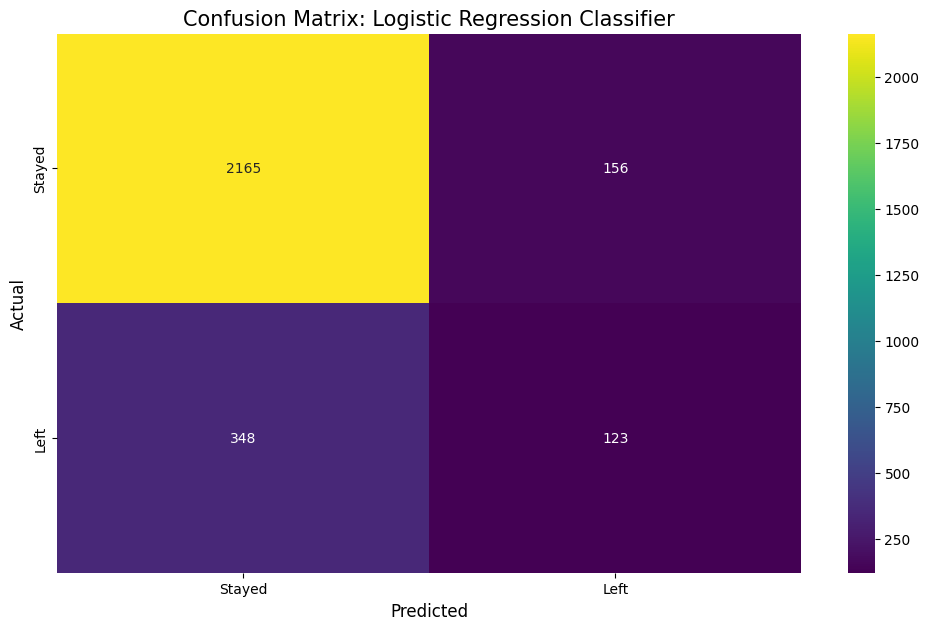

In [195]:
# Generate the confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='viridis', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title("Confusion Matrix: Logistic Regression Classifier", fontsize=15)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

Getting the performance metrics for the model

In [198]:
# Function to generate classification df
def calculate_metrics(y_test, y_pred, classifier):
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Compile metrics into a DataFrame
    metrics = {
        'classifier': [classifier],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1-score': [f1]
        }

    metrics_df = pd.DataFrame(metrics)
    
    return metrics_df

# Get metrics from model
metrics_log_df = calculate_metrics(y_test, y_pred, "Logistic Regression Model")

# Displaying DF
metrics_log_df

,classifier,accuracy,precision,recall,f1-score
0,Logistic Regression Model,0.819484,0.44086,0.261146,0.328


##### Reflection on the Model Performance
**Results from Confusion Matrix**
- True negatives:
- True positives:
- False negatives:
- False positives:

**Performance Metrics**
- Accuracy:
- Precision: 
- Recall:
- F1-score: 

#### Random Forrest Classifier

In [ ]:
### YOUR CODE HERE ###


# Pace: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.